In [ ]:

import os
os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"
import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel

from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


input_size = 512
horizon = 24
dataset = "ETTh1"
epochs = 300

# read data：
Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size
Y_df.drop(columns=["index"], inplace=True)

# ini model
mixmodel = MIXModel(
        h = horizon,
        input_size = input_size,
        decomp_kernel_size = 25, 
        transformer_input_size = 192,
        n_blocks = [1, 1, 1],
        mlp_units = 3 * [[256, 256]],
        n_pool_kernel_size = [16, 8, 1],
        n_freq_downsample = [16, 8, 1],
        pooling_mode = "MaxPool1d",
        interpolation_mode = "linear",
        dropout_prob_theta=0.2,
        mlp_activation = "ReLU",
        
        encoder_layers = 3,
        n_heads = 4,
        hidden_size = 64,
        linear_hidden_size = 128,
        dropout = 0.2,
        fc_dropout = 0.2,
        head_dropout = 0.0,
        attn_dropout = 0.0,
        patch_len = 16,
        stride = 8,
        revin = True,
        revin_affine = False,
        revin_subtract_last = True,
        activation = "gelu",
        res_attention = True,
        batch_normalization = False,
        learn_pos_embed = True,
        loss=MAE(),
        valid_loss=MAE(),
        max_steps = epochs,
        learning_rate = 1e-4,
        num_lr_decays = -1,
        early_stop_patience_steps = 3,
        val_check_steps = 20,
        batch_size = 128,
        valid_batch_size = None,
        windows_batch_size = 1024, 
        inference_windows_batch_size = 1024,
        step_size = 2, 
        scaler_type = "identity",
        random_seed = 2023,
        num_workers_loader = 0, # 取决于 cpu 数量
        stat_exog_list=None,
        hist_exog_list=None,
        futr_exog_list=None,
        exclude_insample_y=False,
        drop_last_loader = False,
)

# fit & test model
nf = NeuralForecast(models=[mixmodel], freq=freq)
Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size,step_size=1, n_windows=None)
# calculate matrics
from neuralforecast.losses.numpy import mae, mse
y_true = Y_hat_df.y.values
y_hat = Y_hat_df["MIXModel"].values
n_series = len(Y_hat_df.unique_id.unique())
y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)
print("\n" * 4)
print("Parsed results")
print(f"MIXModel {dataset} h={horizon}")
print("y_true.shape (n_series, n_windows, n_time_out):\t", y_true.shape)
print("y_hat.shape  (n_series, n_windows, n_time_out):\t", y_hat.shape)
# print(' best validation hyperparameter:\t', nf.models[0].results.get_best_result().config)
print("MSE: ", mse(y_hat, y_true))
print("MAE: ", mae(y_hat, y_true))
# Y_hat_df.to_csv(f'./data/{dataset}_{horizon}_dsp.csv', index=False)


In [ ]:
### 这个文件和automixmodel是一样的，只是为了测试交叉验证的结果和
# predictisample的结果是否一致，有可能是predictisample的结果没有经过标准化。

# 经过实验证明predictinsample的结果确实没有标准化

import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel

from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


input_size = 512
horizon = 336
dataset = "Weather"
epochs = 300

# read data：
Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size
Y_df.drop(columns=["index"], inplace=True)

# ini model
mixmodel = MIXModel(
        h = horizon,
        input_size = input_size,
        decomp_kernel_size = 25, 
        transformer_input_size = 192,
        n_blocks = [1, 1, 1],
        mlp_units = 3 * [[256, 256]],
        n_pool_kernel_size = [16, 8, 1],
        n_freq_downsample = [16, 8, 1],
        pooling_mode = "MaxPool1d",
        interpolation_mode = "linear",
        dropout_prob_theta=0.2,
        mlp_activation = "ReLU",
        
        encoder_layers = 3,
        n_heads = 4,
        hidden_size = 64,
        linear_hidden_size = 128,
        dropout = 0.2,
        fc_dropout = 0.2,
        head_dropout = 0.0,
        attn_dropout = 0.0,
        patch_len = 16,
        stride = 8,
        revin = True,
        revin_affine = False,
        revin_subtract_last = True,
        activation = "gelu",
        res_attention = True,
        batch_normalization = False,
        learn_pos_embed = True,
        loss=MAE(),
        valid_loss=MAE(),
        max_steps = epochs,
        learning_rate = 1e-4,
        num_lr_decays = -1,
        early_stop_patience_steps = 3,
        val_check_steps = 20,
        batch_size = 128,
        valid_batch_size = None,
        windows_batch_size = 1024, 
        inference_windows_batch_size = 1024,
        step_size = 2, 
        scaler_type = "identity",
        random_seed = 2023,
        num_workers_loader = 0, # 取决于 cpu 数量
        stat_exog_list=None,
        hist_exog_list=None,
        futr_exog_list=None,
        exclude_insample_y=False,
        drop_last_loader = False,
)

# fit & test model
nf = NeuralForecast(models=[mixmodel], freq=freq)
Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size,step_size=1, n_windows=None)
# calculate matrics
from neuralforecast.losses.numpy import mae, mse
y_true = Y_hat_df.y.values
y_hat = Y_hat_df["MIXModel"].values
n_series = len(Y_hat_df.unique_id.unique())
y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)
print("\n" * 4)
print("Parsed results")
print(f"MIXModel {dataset} h={horizon}")
print("y_true.shape (n_series, n_windows, n_time_out):\t", y_true.shape)
print("y_hat.shape  (n_series, n_windows, n_time_out):\t", y_hat.shape)
# print(' best validation hyperparameter:\t', nf.models[0].results.get_best_result().config)
print("MSE: ", mse(y_hat, y_true))
print("MAE: ", mae(y_hat, y_true))
Y_hat_df.to_csv(f'./data/{dataset}_{horizon}_dsp.csv', index=False)


In [ ]:
### 这个文件和automixmodel是一样的，只是为了测试交叉验证的结果和
# predictisample的结果是否一致，有可能是predictisample的结果没有经过标准化。

# 经过实验证明predictinsample的结果确实没有标准化

import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel
from neuralforecast.models import PatchTST
from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


input_size = 336
horizon = 336
dataset = "Weather"
epochs = 300

# read data：
Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size
Y_df.drop(columns=["index"], inplace=True)

# ini model
mixmodel = PatchTST(
        h = horizon,
        input_size = input_size,
        
        encoder_layers = 3,
        n_heads = 8,
        hidden_size = 64,
        linear_hidden_size = 256,
        dropout = 0.2,
        fc_dropout = 0.2,
        head_dropout = 0.0,
        attn_dropout = 0.0,
        patch_len = 16,
        stride = 8,
        revin = True,
        revin_affine = False,
        revin_subtract_last = True,
        activation = "gelu",
        res_attention = True,
        batch_normalization = False,
        learn_pos_embed = True,
        loss=MAE(),
        valid_loss=MAE(),
        max_steps = epochs,
        learning_rate = 1e-3,
        num_lr_decays = -1,
        early_stop_patience_steps = 3,
        val_check_steps = 10,
        batch_size = 32,
        valid_batch_size = None,
        windows_batch_size = 1024, 
        inference_windows_batch_size = 1024,
        step_size = 2, 
        scaler_type = "standard",
        random_seed = 2023,
        num_workers_loader = 0, # 取决于 cpu 数量
        stat_exog_list=None,
        hist_exog_list=None,
        futr_exog_list=None,
        exclude_insample_y=False,
        drop_last_loader = False,
)

# fit & test model
nf = NeuralForecast(models=[mixmodel], freq=freq)
Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size,step_size=1, n_windows=None)
# calculate matrics
from neuralforecast.losses.numpy import mae, mse
y_true = Y_hat_df.y.values
y_hat = Y_hat_df["PatchTST"].values
n_series = len(Y_hat_df.unique_id.unique())
y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)
print("\n" * 4)
print("Parsed results")
print(f"PatchTST {dataset} h={horizon}")
print("y_true.shape (n_series, n_windows, n_time_out):\t", y_true.shape)
print("y_hat.shape  (n_series, n_windows, n_time_out):\t", y_hat.shape)
# print(' best validation hyperparameter:\t', nf.models[0].results.get_best_result().config)
print("MSE: ", mse(y_hat, y_true))
print("MAE: ", mae(y_hat, y_true))
Y_hat_df.to_csv(f'./data/{dataset}_{horizon}_tst.csv', index=False)

In [ ]:
nf.save(path='./checkpoints/best_ETTh1_tst',overwrite=True)

: 

In [ ]:
### 这个文件和automixmodel是一样的，只是为了测试交叉验证的结果和
# predictisample的结果是否一致，有可能是predictisample的结果没有经过标准化。

# 经过实验证明predictinsample的结果确实没有标准化

import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel

from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


input_size = 512
horizon = 720
dataset = "ETTh1"
epochs = 30

# read data：
Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size
Y_df.drop(columns=["index"], inplace=True)

# ini model
mixmodel = MIXModel(
        h = horizon,
        input_size = input_size,
        decomp_kernel_size = 17, 
        transformer_input_size = 192,
        n_blocks = [1, 1, 1],
        mlp_units = 3 * [[512, 512]],
        n_pool_kernel_size = [16, 8, 1],
        n_freq_downsample = [16, 8, 1],
        pooling_mode = "MaxPool1d",
        interpolation_mode = "linear",
        dropout_prob_theta=0.2,
        mlp_activation = "ReLU",
        
        encoder_layers = 3,
        n_heads = 8,
        hidden_size = 64,
        linear_hidden_size = 256,
        dropout = 0.2,
        fc_dropout = 0.2,
        head_dropout = 0.0,
        attn_dropout = 0.0,
        patch_len = 16,
        stride = 8,
        revin = True,
        revin_affine = False,
        revin_subtract_last = True,
        activation = "gelu",
        res_attention = True,
        batch_normalization = False,
        learn_pos_embed = True,
        loss=MAE(),
        valid_loss=MAE(),
        max_steps = epochs,
        learning_rate = 1e-3,
        num_lr_decays = -1,
        early_stop_patience_steps = 3,
        val_check_steps = 100,
        batch_size = 32,
        valid_batch_size = None,
        windows_batch_size = 1024, 
        inference_windows_batch_size = 1024,
        step_size = 2, 
        scaler_type = "standard",
        random_seed = 2023,
        num_workers_loader = 0, # 取决于 cpu 数量
        stat_exog_list=None,
        hist_exog_list=None,
        futr_exog_list=None,
        exclude_insample_y=False,
        drop_last_loader = False,
)

# fit & test model
nf = NeuralForecast(models=[mixmodel], freq=freq)
fcsts = nf.cross_validation_test(df=Y_df, val_size=val_size, test_size=test_size,step_size=1, n_windows=None)



In [ ]:
### 这个文件和automixmodel是一样的，只是为了测试交叉验证的结果和
# predictisample的结果是否一致，有可能是predictisample的结果没有经过标准化。

# 经过实验证明predictinsample的结果确实没有标准化

import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel

from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


input_size = 512
horizon = 720
dataset = "ETTh1"
epochs = 30

# read data：
Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size
Y_df.drop(columns=["index"], inplace=True)

# ini model
mixmodel = MIXModel(
        h = horizon,
        input_size = input_size,
        decomp_kernel_size = 17, 
        transformer_input_size = 192,
        n_blocks = [1, 1, 1],
        mlp_units = 3 * [[512, 512]],
        n_pool_kernel_size = [16, 8, 1],
        n_freq_downsample = [16, 8, 1],
        pooling_mode = "MaxPool1d",
        interpolation_mode = "linear",
        dropout_prob_theta=0.2,
        mlp_activation = "ReLU",
        
        encoder_layers = 3,
        n_heads = 8,
        hidden_size = 64,
        linear_hidden_size = 256,
        dropout = 0.2,
        fc_dropout = 0.2,
        head_dropout = 0.0,
        attn_dropout = 0.0,
        patch_len = 16,
        stride = 8,
        revin = True,
        revin_affine = False,
        revin_subtract_last = True,
        activation = "gelu",
        res_attention = True,
        batch_normalization = False,
        learn_pos_embed = True,
        loss=MAE(),
        valid_loss=MAE(),
        max_steps = epochs,
        learning_rate = 1e-3,
        num_lr_decays = -1,
        early_stop_patience_steps = 3,
        val_check_steps = 100,
        batch_size = 32,
        valid_batch_size = None,
        windows_batch_size = 1024, 
        inference_windows_batch_size = 1024,
        step_size = 2, 
        scaler_type = "standard",
        random_seed = 2023,
        num_workers_loader = 0, # 取决于 cpu 数量
        stat_exog_list=None,
        hist_exog_list=None,
        futr_exog_list=None,
        exclude_insample_y=False,
        drop_last_loader = False,
)

# fit & test model
nf = NeuralForecast(models=[mixmodel], freq=freq)
fcsts = nf.cross_validation_test(df=Y_df, val_size=val_size, test_size=test_size,step_size=1, n_windows=None)



array([[ 0.5306668 ],
       [ 0.38444424],
       [ 0.14856729],
       ...,
       [-1.5140828 ],
       [-1.5110341 ],
       [-1.4921513 ]], dtype=float32)

In [ ]:
import numpy as np


n_windows = int(test_size - horizon)+1
last_date = Y_df['ds'][-test_size-1:-test_size].values[0]
test_df = Y_df[Y_df['ds']>last_date]

y_true = np.empty(0)  # 创建一个空的 NumPy 数组
for unique_id, df in test_df.groupby("unique_id"):
    y_array = np.empty(n_windows * horizon)
    for i in range(n_windows):
        y_array[i * horizon:(i + 1) * horizon - 1] = df.y.values[i:i + horizon - 1]
    y_true = np.concatenate((y_true, y_array))

y_true = y_true.astype(df['y'].dtype)  # 将数据类型转换为与原始数据一致


def get_ytrue(Y_df,test_size,horizon):
    n_windows = int(test_size - horizon)+1
    last_date = Y_df['ds'][-test_size:-test_size+1].values[0]
    test_df = Y_df[Y_df['ds']>last_date]

    y_true = np.empty(0)  
    for unique_id, df in test_df.groupby("unique_id"):
        y_array = np.empty(n_windows * horizon)
        for i in range(n_windows):
            y_array[i * horizon:(i + 1) * horizon - 1] = df.y.values[i:i + horizon - 1]
        y_true = np.concatenate((y_true, y_array))

    y_true = y_true.astype(df['y'].dtype) 
    return y_true

In [ ]:
from neuralforecast.losses.numpy import mae, mse
y_hat = fcsts
n_series = len(Y_df.unique_id.unique())
y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)
print("\n" * 4)
print("Parsed results")
print(f"MIXModel {dataset} h={horizon}")
print("y_true.shape (n_series, n_windows, n_time_out):\t", y_true.shape)
print("y_hat.shape  (n_series, n_windows, n_time_out):\t", y_hat.shape)
# print(' best validation hyperparameter:\t', nf.models[0].results.get_best_result().config)
print("MSE: ", mse(y_hat, y_true))
print("MAE: ", mae(y_hat, y_true))






Parsed results
MIXModel ETTh1 h=720
y_true.shape (n_series, n_windows, n_time_out):	 (7, 2161, 720)
y_hat.shape  (n_series, n_windows, n_time_out):	 (7, 2161, 720)
MSE:  0.4415082935024958
MAE:  0.4582310035116835


In [ ]:
from neuralforecast.core import NeuralForecast
nf = NeuralForecast.load('./checkpoints/best_weather/')

Global seed set to 2023


"activation":                   gelu
"alias":                        None
"attn_dropout":                 0.0
"batch_normalization":          True
"batch_size":                   32
"decoder_layers":               1
"decomp_kernel_size":           25
"drop_last_loader":             False
"dropout":                      0.2
"dropout_prob_theta":           0.2
"early_stop_patience_steps":    3
"encoder_layers":               3
"exclude_insample_y":           False
"fc_dropout":                   0.2
"futr_exog_list":               None
"h":                            720
"head_dropout":                 0.0
"hidden_size":                  64
"hist_exog_list":               None
"inference_windows_batch_size": 1024
"input_size":                   512
"interpolation_mode":           linear
"is_pretrain":                  False
"learn_pos_embed":              True
"learning_rate":                0.001
"linear_hidden_size":           256
"loss":                         MAE()
"max_steps":     

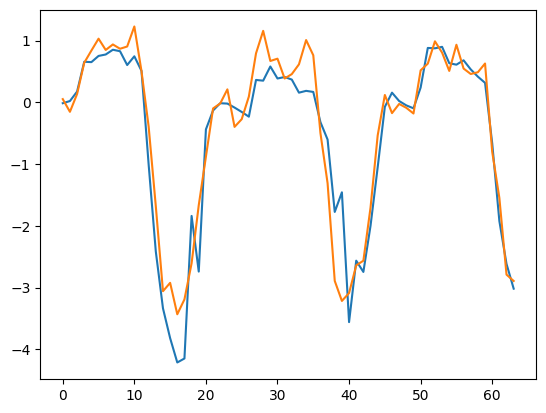

In [ ]:
import matplotlib.pyplot as plt
nvar = 4
time = 20
plt.plot(y_true[nvar][time][:64])
plt.plot(y_hat[nvar][time][:64])

In [ ]:
(test_size-1)*7

20153

In [ ]:
test_df.shape

(20153, 3)

In [ ]:
import numpy as np


n_windows = int(test_size - horizon)+1
last_date = Y_df['ds'][-test_size:-test_size+1].values[0]
test_df = Y_df[Y_df['ds']>last_date]
nvars = len(Y_df.unique_id.unique())
y_array = np.empty(n_windows * horizon * nvars,dtype=df['y'].dtype)
for j in range(nvars):
    y_array_shift = j*n_windows*horizon
    df_shift = j*(test_size-1)
    print('var:',j,'y_array_shift:',y_array_shift,'df_shift:',df_shift)
    for i in range(n_windows):
        y_array[(i * horizon)+y_array_shift:((i + 1) * horizon - 1)+y_array_shift] = test_df.y.values[(i)+df_shift:(i + horizon - 1)+df_shift]


var: 0 y_array_shift: 0 df_shift: 0
var: 1 y_array_shift: 1555920 df_shift: 2879
var: 2 y_array_shift: 3111840 df_shift: 5758
var: 3 y_array_shift: 4667760 df_shift: 8637
var: 4 y_array_shift: 6223680 df_shift: 11516
var: 5 y_array_shift: 7779600 df_shift: 14395
var: 6 y_array_shift: 9335520 df_shift: 17274


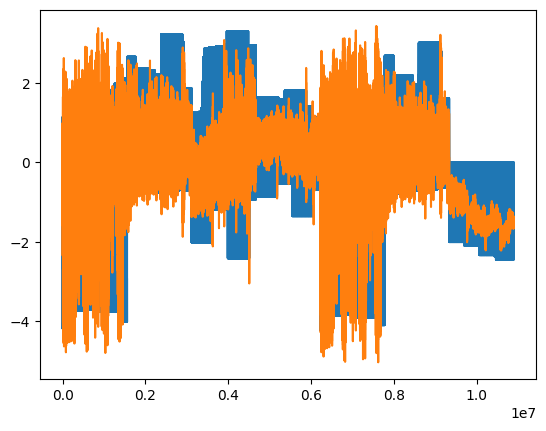

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_true)
plt.plot(fcsts)

In [ ]:

# calculate matrics
from neuralforecast.losses.numpy import mae, mse
y_true = y_true
y_hat = fcsts
n_series = len(Y_df.unique_id.unique())
y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)
print("\n" * 4)
print("Parsed results")
print(f"MIXModel {dataset} h={horizon}")
print("y_true.shape (n_series, n_windows, n_time_out):\t", y_true.shape)
print("y_hat.shape  (n_series, n_windows, n_time_out):\t", y_hat.shape)
# print(' best validation hyperparameter:\t', nf.models[0].results.get_best_result().config)
print("MSE: ", mse(y_hat, y_true))
print("MAE: ", mae(y_hat, y_true))






Parsed results
MIXModel ETTh1 h=720
y_true.shape (n_series, n_windows, n_time_out):	 (7, 2161, 720)
y_hat.shape  (n_series, n_windows, n_time_out):	 (7, 2161, 720)
MSE:  0.4744593246925006
MAE:  0.47845221038159763


In [ ]:
Y_hat_df.to_csv(f"./data/{dataset}_{horizon}_dsp_no_overlap.csv", index=False)

<Axes: ylabel='Density'>

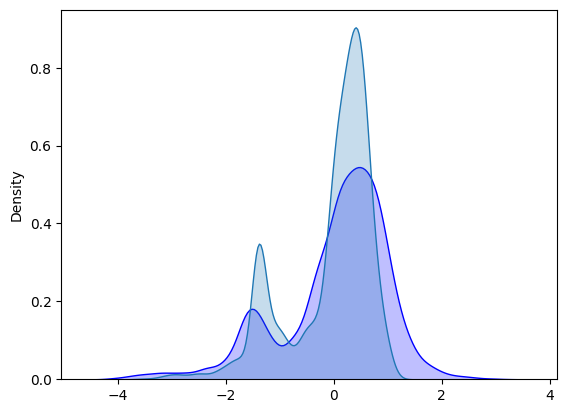

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


sns.kdeplot(Y_hat_df.y.values, shade=True, color='b',label = 'actual')
sns.kdeplot(Y_hat_df.MIXModel.values, shade=True,label = 'MIXModel')

In [ ]:
Y_hat_df

,unique_id,ds,cutoff,MIXModel,y
0,HUFL,2017-10-24 00:00:00,2017-10-23 23:00:00,0.358006,0.385361
1,HUFL,2017-10-24 01:00:00,2017-10-23 23:00:00,0.300905,0.117235
2,HUFL,2017-10-24 02:00:00,2017-10-23 23:00:00,0.198489,0.192195
3,HUFL,2017-10-24 03:00:00,2017-10-23 23:00:00,0.184673,0.085041
4,HUFL,2017-10-24 04:00:00,2017-10-23 23:00:00,0.239835,0.138538
...,...,...,...,...,...
20155,OT,2018-02-20 19:00:00,2018-01-21 23:00:00,-1.524877,-2.003877
20156,OT,2018-02-20 20:00:00,2018-01-21 23:00:00,-1.521020,-2.003877
20157,OT,2018-02-20 21:00:00,2018-01-21 23:00:00,-1.502344,-1.776565
20158,OT,2018-02-20 22:00:00,2018-01-21 23:00:00,-1.478060,-1.742809


<Axes: >

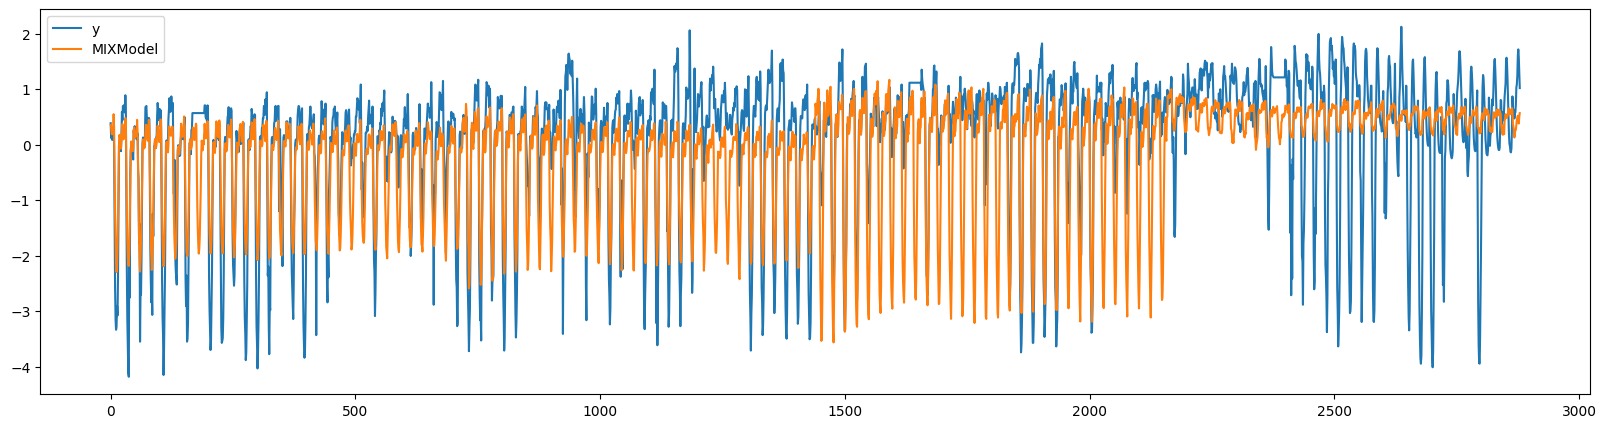

In [ ]:
HUFL = Y_hat_df[Y_hat_df['unique_id']=='HUFL']
HUFL[['y','MIXModel']].plot(figsize=(20,5))


In [ ]:
Y_hat_df.to_csv(f"./data/{dataset}_{horizon}_dsp.csv", index=False)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成示例时间序列数据
time = np.arange(0, 10, 0.1)  # 时间点
data = np.sin(time) + np.random.normal(0, 0.2, len(time))  # 示例数据，可以替换成您的实际数据

# 创建瀑布图
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i in range(len(time)):
    x = np.array([time[i], time[i]])  # 时间点
    y = np.array([data[i], data[i]])  # 数据值
    z = np.array([0, i])  # Z轴坐标，表示时间点
    ax.plot(x, y, z, color='b')

ax.set_xlabel('时间')
ax.set_ylabel('数据值')
ax.set_zlabel('时间点')

plt.show()

In [ ]:
from neuralforecast.models import PatchTST



input_size = 512
horizon = 336
dataset = "ETTh1"
epochs = 300


Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size

Y_df.drop(columns=["index"], inplace=True)

patchtst = PatchTST(
        h = horizon,
        input_size = 512,
        loss=MAE(),
        batch_size = 32,
        learning_rate = 1e-3,
        max_steps = epochs,
        early_stop_patience_steps = 2,
        val_check_steps = 10,
)
nf = NeuralForecast(models=[patchtst], freq=freq)
Y_hat_df = nf.cross_validation(df=Y_df, val_size=val_size, test_size=test_size,step_size=1, n_windows=None)

from neuralforecast.losses.numpy import mae, mse

y_true = Y_hat_df.y.values
y_hat = Y_hat_df["PatchTST"].values
n_series = len(Y_hat_df.unique_id.unique())
y_true = y_true.reshape(n_series, -1, horizon)
y_hat = y_hat.reshape(n_series, -1, horizon)
print("\n" * 4)
print("Parsed results")
print(f"PatchTST {dataset} h={horizon}")
# print("test_size", test_size)
print("y_true.shape (n_series, n_windows, n_time_out):\t", y_true.shape)
print("y_hat.shape  (n_series, n_windows, n_time_out):\t", y_hat.shape)
# print(' best validation hyperparameter:\t', nf.models[0].results.get_best_result().config)
print("MSE: ", mse(y_hat, y_true))
print("MAE: ", mae(y_hat, y_true))

NameError: name 'LongHorizon2' is not defined

In [ ]:
Y_hat_df.to_csv(f"./data/{dataset}_{horizon}_tst_no_overlap.csv", index=False)

In [ ]:
import pandas as pd
dsp = pd.read_csv('./data/ETTh1_720_dsp_no_overlap.csv')
tst = pd.read_csv('./data/ETTh1_720_tst_no_overlap.csv')
result = pd.merge(left=tst,right=dsp,how='outer')
result

,unique_id,ds,cutoff,PatchTST,y,MIXModel
0,HUFL,2017-10-24 00:00:00,2017-10-23 23:00:00,0.346556,0.385361,0.358006
1,HUFL,2017-10-24 01:00:00,2017-10-23 23:00:00,0.081733,0.117235,0.300905
2,HUFL,2017-10-24 02:00:00,2017-10-23 23:00:00,0.006027,0.192195,0.198489
3,HUFL,2017-10-24 03:00:00,2017-10-23 23:00:00,0.464775,0.085041,0.184673
4,HUFL,2017-10-24 04:00:00,2017-10-23 23:00:00,0.111668,0.138538,0.239835
...,...,...,...,...,...,...
20155,OT,2018-02-20 19:00:00,2018-01-21 23:00:00,-1.680924,-2.003877,-1.524877
20156,OT,2018-02-20 20:00:00,2018-01-21 23:00:00,-1.629584,-2.003877,-1.521020
20157,OT,2018-02-20 21:00:00,2018-01-21 23:00:00,-1.677397,-1.776565,-1.502344
20158,OT,2018-02-20 22:00:00,2018-01-21 23:00:00,-1.582867,-1.742809,-1.478060


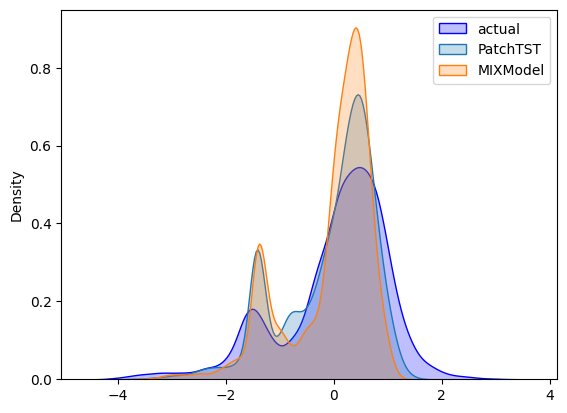

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.kdeplot(result.y.values, shade=True, color='b',label = 'actual')
sns.kdeplot(result.PatchTST.values, shade=True,label = 'PatchTST')
sns.kdeplot(result.MIXModel.values, shade=True,label = 'MIXModel')

# plt.axvline(median_actual, color='b', linestyle='--', label='Median (actual)')
# plt.axvline(median_patchtst, color='orange', linestyle='--', label='Median (PatchTST)')
# plt.axvline(median_mixmodel, color='green', linestyle='--', label='Median (MIXModel)')
plt.legend()

,unique_id,ds,cutoff,PatchTST,y,MIXModel
0,HUFL,2017-10-24 00:00:00,2017-10-23 23:00:00,0.346556,0.385361,0.368823
1,HUFL,2017-10-24 01:00:00,2017-10-23 23:00:00,0.081733,0.117235,0.244742
2,HUFL,2017-10-24 02:00:00,2017-10-23 23:00:00,0.006027,0.192195,0.131336
3,HUFL,2017-10-24 03:00:00,2017-10-23 23:00:00,0.464774,0.085041,0.249039
4,HUFL,2017-10-24 04:00:00,2017-10-23 23:00:00,0.111668,0.138538,0.190978
...,...,...,...,...,...,...
10891435,OT,2018-02-20 19:00:00,2018-01-21 23:00:00,-1.680924,-2.003877,-1.538476
10891436,OT,2018-02-20 20:00:00,2018-01-21 23:00:00,-1.629585,-2.003877,-1.505970
10891437,OT,2018-02-20 21:00:00,2018-01-21 23:00:00,-1.677397,-1.776565,-1.502775
10891438,OT,2018-02-20 22:00:00,2018-01-21 23:00:00,-1.582866,-1.742809,-1.466522


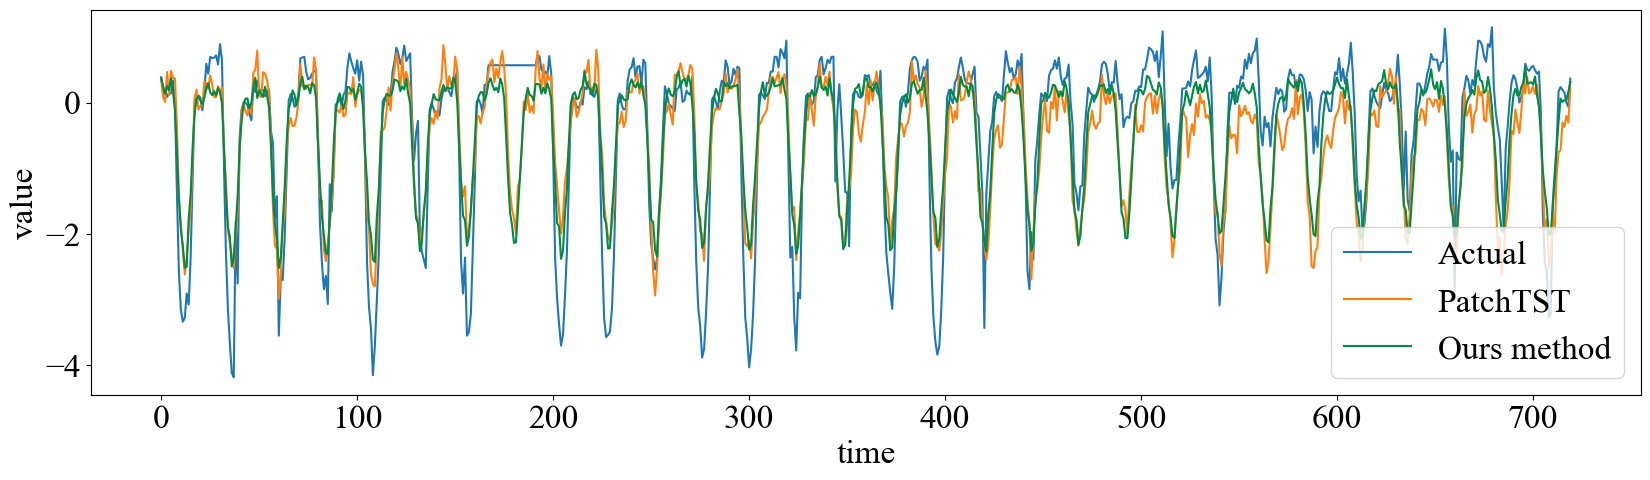

In [ ]:

import pandas as pd
dsp = pd.read_csv('./data/ETTh1_720_dsp.csv')
tst = pd.read_csv('./data/ETTh1_720_tst.csv')
result = pd.merge(left=tst,right=dsp,how='outer')
from matplotlib import pyplot as plt
import matplotlib as mpl
plt.figure(figsize=(20,5))
# plt.grid(True)
mpl.rcParams['font.size'] = 20
mpl.rcParams['font.family'] = 'serif'
mpl.rcParams['font.serif'] = 'Times New Roman'
plt.plot(result[0:720].y.values, label='Actual')
plt.plot(result[0:720].PatchTST.values, label='PatchTST')
plt.plot(result[0:720].MIXModel.values, label='Ours method',color='#008B45')
plt.xlabel('time')
plt.ylabel('value')
plt.legend()

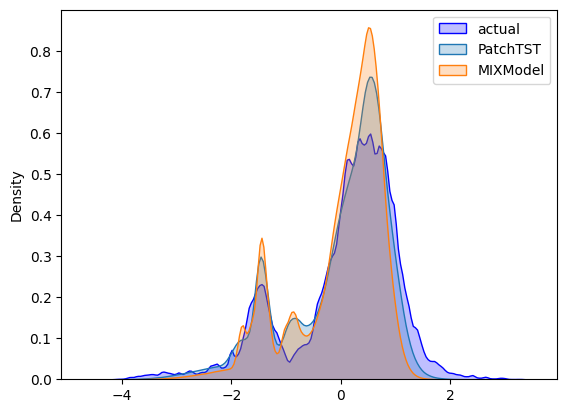

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

median_actual = np.median(result.y.values)
median_patchtst = np.median(result.PatchTST.values)
median_mixmodel = np.median(result.MIXModel.values)

sns.kdeplot(result.y.values, shade=True, color='b',label = 'actual')
sns.kdeplot(result.PatchTST.values, shade=True,label = 'PatchTST')
sns.kdeplot(result.MIXModel.values, shade=True,label = 'MIXModel')

kde = sns.kdeplot(data, shade=False)
x, y = kde.get_lines()[0].get_data()
peak_x = x[np.argmax(y)]
peak_y = y.max()

# 绘制峰值
plt.plot(peak_x, peak_y, 'ro', label='Peak')
# plt.axvline(median_actual, color='b', linestyle='--', label='Median (actual)')
# plt.axvline(median_patchtst, color='orange', linestyle='--', label='Median (PatchTST)')
# plt.axvline(median_mixmodel, color='green', linestyle='--', label='Median (MIXModel)')
plt.legend()


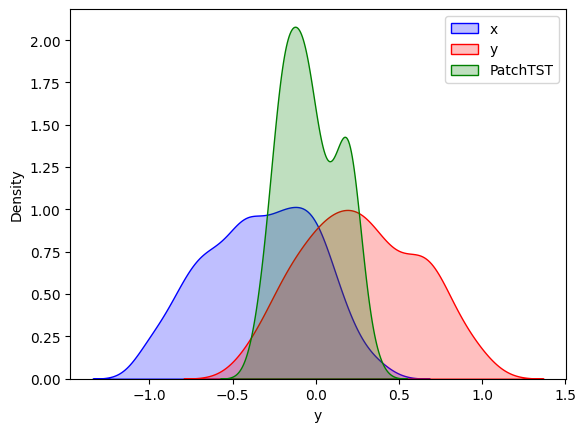

In [ ]:

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 使用seaborn绘制核密度估计曲线
sns.kdeplot(Y_df[:512].y, shade=True, color='b',label = 'x')
sns.kdeplot(Y_df[512:512+192].y, shade=True, color='r',label = 'y')
sns.kdeplot(predict.PatchTST, shade=True, color='g',label = 'PatchTST')
plt.legend()
plt.show()


In [ ]:
import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel

from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

input_size = 512
horizon = 192
dataset = "ETTh1"
epochs = 300


Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size

Y_df.drop(columns=["index"], inplace=True)

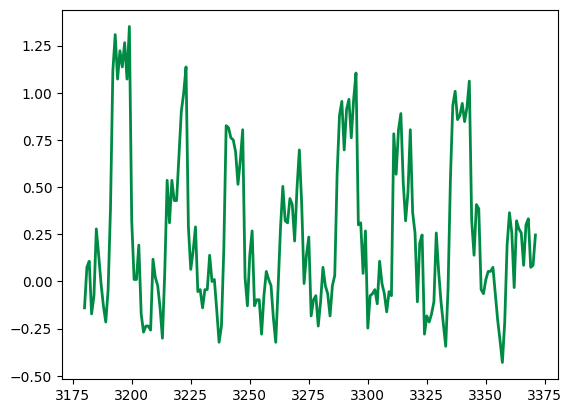

In [ ]:
import matplotlib.pyplot as plt
# plt.axis('off')
point = 300
testset = Y_df[test_size+point:test_size+point+192]
plt.plot(testset.y,color = '#008B45', linewidth=2.0)

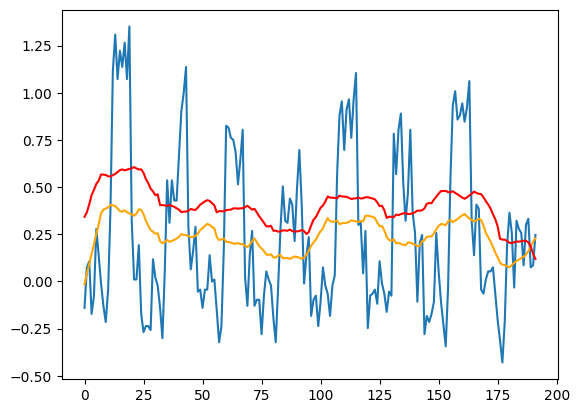

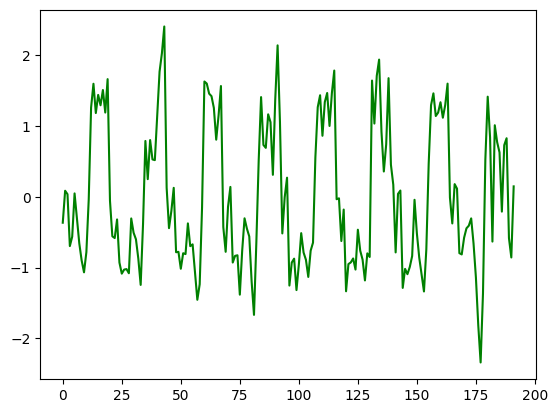

In [ ]:
### 测试两个序列模块


import torch
import torch.nn as nn

class moving_avg(nn.Module):
    """
    Moving average block to highlight the trend of time series
    """

    def __init__(self, kernel_size, stride):
        super(moving_avg, self).__init__()
        self.kernel_size = kernel_size
        self.avg = nn.AvgPool1d(kernel_size=kernel_size, stride=stride, padding=0)

    def forward(self, x):
        # padding on the both ends of time series
        front = x[:, 0:1, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        end = x[:, -1:, :].repeat(1, (self.kernel_size - 1) // 2, 1)
        x = torch.cat([front, x, end], dim=1)
        x = self.avg(x.permute(0, 2, 1))
        x = x.permute(0, 2, 1)
        return x

class moving_std(nn.Module):
    """
    Moving standard deviation block for time series data
    """

    def __init__(self, kernel_size, stride):
        super(moving_std, self).__init__()
        self.kernel_size = kernel_size
        self.stride = stride

    def forward(self, x):
        # Calculate the standard deviation using a sliding window
        batch_size, seq_len, num_features = x.size()
        pad_size = min((self.kernel_size - 1) // 2, seq_len - 1)
        padded_x = torch.nn.functional.pad(x.permute(0,2,1), (pad_size, pad_size), mode='reflect').permute(0,2,1)
        std_values = []
       
        for i in range(0, seq_len, self.stride):
            window = padded_x[:, i:i+self.kernel_size, :]
            std = torch.std(window, dim=1, unbiased=False)
            std_values.append(std)
        std_values = torch.stack(std_values, dim=1)
        return std_values
    

import torch
input_sequence = torch.tensor(Y_df["y"].values[test_size+point:test_size+point+192])

input_sequence = input_sequence.unsqueeze(0).unsqueeze(2)

mv = moving_avg(25,1)
ms = moving_std(25,1)
seq_std = ms(input_sequence)
seq_mean = mv(input_sequence)
seq_norm = (input_sequence - seq_mean)/seq_std

import matplotlib.pyplot as plt
plt.plot(input_sequence[0].T[0])
plt.plot(seq_mean[0].T[0],color='orange')
plt.plot(seq_std[0].T[0],color='red')
plt.show()
plt.plot(seq_norm[0].T[0],color='green')
plt.show()


# plt.plot((input_sequence[0].T[0] - seq_mean[0].T[0])/seq_std[0].T[0])

In [ ]:
import torch
input_sequence = seq_std

input_sequence = input_sequence.unsqueeze(0).unsqueeze(2)

mv = moving_avg(25,1)
ms = moving_std(25,1)
seq_std = ms(input_sequence)
seq_mean = mv(input_sequence)
seq_norm = (input_sequence - seq_mean)/seq_std

import matplotlib.pyplot as plt
plt.plot(input_sequence[0].T[0])
plt.plot(seq_mean[0].T[0],color='orange')
plt.plot(seq_std[0].T[0],color='red')
plt.show()
plt.plot(seq_norm[0].T[0],color='green')
plt.show()

ValueError: too many values to unpack (expected 3)

Global seed set to 2023


16-mixed


Predicting: 0it [00:00, ?it/s]

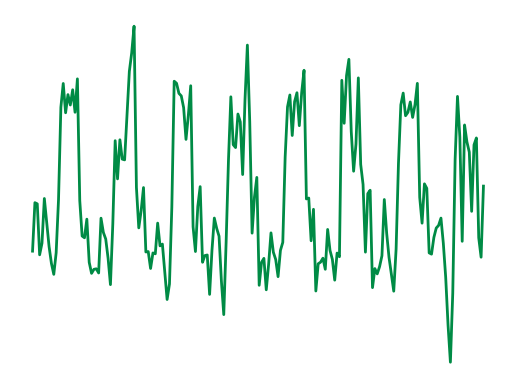

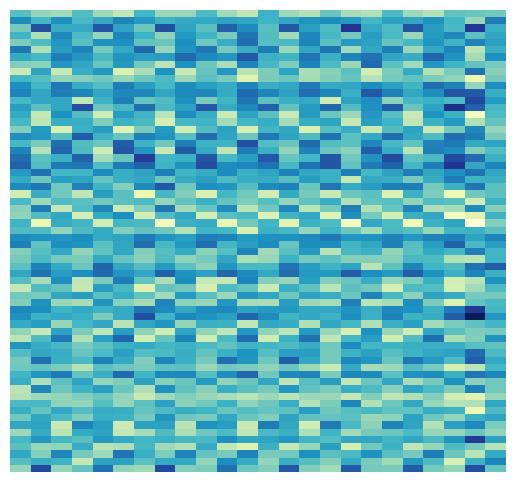

,ds,MIXModel
unique_id,,
HUFL,2016-11-18 12:00:00,0.090747
HUFL,2016-11-18 13:00:00,0.056066
HUFL,2016-11-18 14:00:00,0.070260
HUFL,2016-11-18 15:00:00,0.018748
HUFL,2016-11-18 16:00:00,-0.005666
...,...,...
HUFL,2016-12-02 07:00:00,0.384615
HUFL,2016-12-02 08:00:00,0.230135
HUFL,2016-12-02 09:00:00,0.114248


In [ ]:
from neuralforecast.core import NeuralForecast
nf2 = NeuralForecast.load('checkpoints/best_ETTh1')
predict2 = nf2.predict(df=testset)
predict2

Global seed set to 2023


16-mixed


Predicting: 0it [00:00, ?it/s]

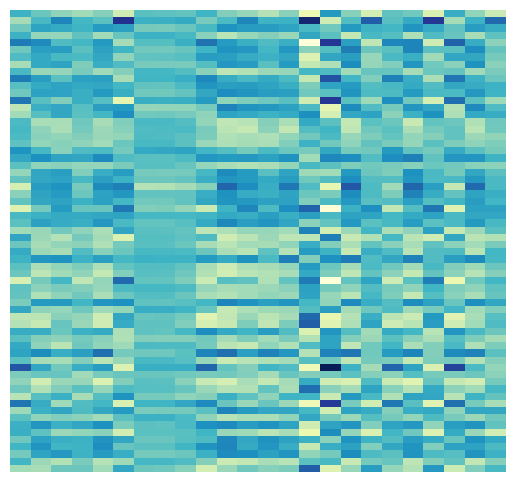

,ds,PatchTST
unique_id,,
HUFL,2016-11-06 00:00:00,0.543282
HUFL,2016-11-06 01:00:00,0.583127
HUFL,2016-11-06 02:00:00,0.594559
HUFL,2016-11-06 03:00:00,0.590639
HUFL,2016-11-06 04:00:00,0.564076
...,...,...
HUFL,2016-11-19 19:00:00,-0.047654
HUFL,2016-11-19 20:00:00,-0.071170
HUFL,2016-11-19 21:00:00,-0.115588


In [ ]:
from neuralforecast.core import NeuralForecast
nf1 = NeuralForecast.load('checkpoints/best_ETTh1_tst')
predict1 = nf1.predict(df=Y_df[test_size:test_size+192])
predict1

In [ ]:
Y_df[512:512+192]

,ds,unique_id,y
512,2016-07-06 08:00:00,HUFL,-0.348835
513,2016-07-06 08:15:00,HUFL,-0.274028
514,2016-07-06 08:30:00,HUFL,-0.182653
515,2016-07-06 08:45:00,HUFL,0.174713
516,2016-07-06 09:00:00,HUFL,0.033433
...,...,...,...
699,2016-07-08 06:45:00,HUFL,0.033433
700,2016-07-08 07:00:00,HUFL,0.216283
701,2016-07-08 07:15:00,HUFL,0.316092
702,2016-07-08 07:30:00,HUFL,-0.124415


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 使用seaborn绘制核密度估计曲线
sns.kdeplot(Y_df[:512].y, shade=True, color='b',label = 'x')
sns.kdeplot(Y_df[512:512+192].y, shade=True, color='r',label = 'y')
sns.kdeplot(predict2.MIXModel, shade=True, color='g',label = 'mixmodel')
plt.legend()
plt.show()

NameError: name 'Y_df' is not defined

In [ ]:
### 这个文件和automixmodel是一样的，只是为了测试交叉验证的结果和
# predictisample的结果是否一致，有可能是predictisample的结果没有经过标准化。

# 经过实验证明predictinsample的结果确实没有标准化

import os

os.environ["PYTORCH_ENABLE_MPS_FALLBACK"] = "1"

import pandas as pd

from neuralforecast.core import NeuralForecast
from neuralforecast.models.mixmodel_rescale_deco import MIXModel

from neuralforecast.losses.pytorch import MAE, MSE
from neuralforecast.losses.numpy import mae, mse

# from datasetsforecast.long_horizon import LongHorizon, LongHorizonInfo
from datasetsforecast.long_horizon2 import LongHorizon2, LongHorizon2Info

import logging
logging.getLogger("pytorch_lightning").setLevel(logging.WARNING)


input_size = 512
horizon = 96
dataset = "ETTh1"
epochs = 300

Y_df = LongHorizon2.load(directory="./data/", group=dataset)
Y_df["ds"] = pd.to_datetime(Y_df["ds"])
n_time = LongHorizon2Info[dataset].n_time
freq = LongHorizon2Info[dataset].freq
val_size = LongHorizon2Info[dataset].val_size
test_size = LongHorizon2Info[dataset].test_size

Y_df.drop(columns=["index"], inplace=True)
Y_df

,ds,unique_id,y
0,2016-07-01 00:00:00,HUFL,-0.279827
1,2016-07-01 01:00:00,HUFL,-0.301290
2,2016-07-01 02:00:00,HUFL,-0.387142
3,2016-07-01 03:00:00,HUFL,-0.397873
4,2016-07-01 04:00:00,HUFL,-0.354948
...,...,...,...
100795,2018-02-20 19:00:00,OT,-2.003877
100796,2018-02-20 20:00:00,OT,-2.003877
100797,2018-02-20 21:00:00,OT,-1.776565
100798,2018-02-20 22:00:00,OT,-1.742809


<Axes: ylabel='Density'>

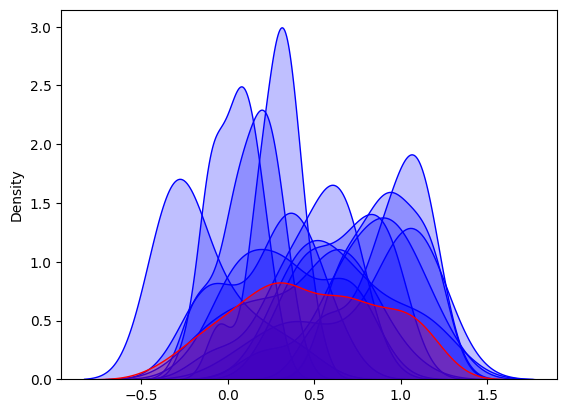

In [ ]:
def sliding_window(sequence, window_size, step_size):
    windows = []  # 存储切分后的窗口
    for i in range(0, len(sequence) - window_size + 1, step_size):
        window = sequence[i:i + window_size]  # 选择窗口的子序列
        windows.append(window)
    return windows

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
windows = sliding_window(Y_df[512:512+336].y.values, 24, 24)
for i, window in enumerate(windows):
  # 使用seaborn绘制核密度估计曲线
  sns.kdeplot(window, shade=True, color='b',label = 'x')
sns.kdeplot(Y_df[512:512+336].y.values, shade=True, color='r',label = 'x')

<Axes: ylabel='Density'>

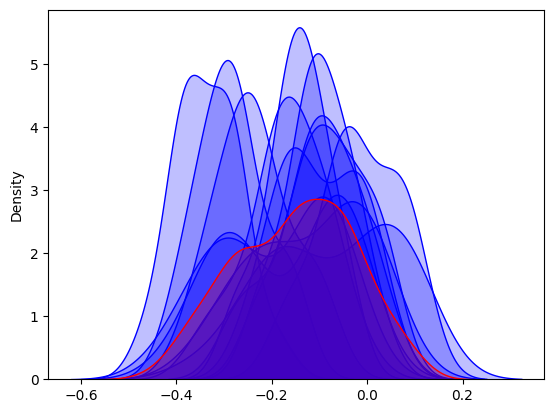

In [ ]:
def sliding_window(sequence, window_size, step_size):
    windows = []  # 存储切分后的窗口
    for i in range(0, len(sequence) - window_size + 1, step_size):
        window = sequence[i:i + window_size]  # 选择窗口的子序列
        windows.append(window)
    return windows

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
windows = sliding_window(predict2.MIXModel.values, 24, 24)
for i, window in enumerate(windows):
  # 使用seaborn绘制核密度估计曲线
  sns.kdeplot(window, shade=True, color='b',label = 'x')
sns.kdeplot(predict2.MIXModel.values, shade=True, color='r', label = 'x')

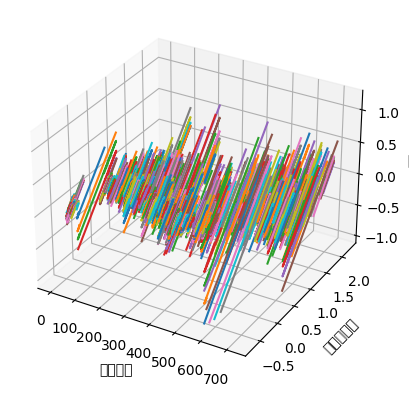

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

window_size = 5  # 窗口大小
offsets = []  # 存储每个窗口的偏移
window_distributions = []  # 存储每个窗口的分布

data = Y_df[:720].y.values

for i in range(len(data) - window_size + 1):
    window = data[i:i + window_size]
    window_mean = np.mean(window)
    offset = window - window_mean  # 计算每个窗口的偏移
    window_distributions.append(window)
    offsets.append(offset)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

for i, offset in enumerate(offsets):
    x = np.arange(i, i + window_size)
    y = window_distributions[i]
    z = offset
    ax.plot(x, y, z)

ax.set_xlabel('窗口索引')
ax.set_ylabel('窗口数据值')
ax.set_zlabel('偏移')

plt.show()
